# The professionalisation of Airbnb in London

## CASA0013: Foundations of Spatial Data Science

### Student Ids: ucfnibb, ucfnanf, ucfnanv, ucfnsqi
### Student numbers: 22070931, 22094647, 22063332, 22153914

### The data and code is available on the github: https://github.com/yuchengli0727/fsds_final_project

In [ ]:
# the main package used in the analysis are pandas, geoplot, and the sklearn.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
import geoplot as gplt
import geoplot.crs as gcrs
from shapely.geometry import Point
import shapely.speedups
import sklearn.cluster as clu

### At first, we calculate the rate of illegal rent houses.

In [ ]:
data = pd.read_csv('listing.csv')

max_number = len(data[data['maximum_nights'] <= 90])
min_number = len(data[data['minimum_nights'] <= 90])

max_illegal = max_number / len(data)
min_illegal = min_number / len(data)

### Using some pandas operations to calculate the top six boroughs in terms of listing density.

In [21]:
data = pd.read_csv('listings.csv')
data = data.groupby('neighbourhood_cleansed').count()

area = pd.read_csv('borough_area.csv')
area.index = area['Borough']

df_inner = data.merge(area, how='inner', left_index=True, right_index=True)
df_inner['count'] = df_inner['id'] / df_inner['Area']
df_inner = df_inner.sort_values(by='count', ascending=False)
#df_inner['count']


### Filter the super host in the listings and make a clean dataframe called revenue.csv which is easier to process.

In [ ]:
'''
data = pd.read_csv('listings.csv')
data = data[data['host_is_superhost'] == t]
data = data['host_id', 'price,calculated_host_listings_count_entire_homes', 'reviews_per_month']
data.to_csv('revenue.csv')
'''

###  Using the revenue.csv to calculate the total income of the super hosts, and the raw data to calculate the total income of the total hosts.

In [ ]:
data = pd.read_csv('revenue.csv')
total_data = pd.read_csv('listings.csv')

total_data['month_price'] = total_data['price'] * total_data['reviews_per_month']

data = data.sort_values(by = 'calculated_host_listings_count_entire_homes', ascending=False)
data = data.dropna()
data['month_price'] = data['price'] * data['reviews_per_month']

rate = sum(data['month_price'])/sum(total_data['month_price'])

### Before using geoplot, transform the csv data to the geojson data. 

In [ ]:
import csv

data = pd.read_csv('listings.csv')
data = data[['longitude', 'latitude']]
data.to_csv('initial_point.csv')

csv_file = open('initial_point.csv', encoding='gbk')
csv_reader = csv.reader(csv_file)

geojson = '{"type":"FeatureCollection","features":['
for index, row in enumerate(csv_reader):
    geojson += '{"geometry":{"coordinates":[%f,%f],"type":"Point"},"properties":{},"type":"Feature"},' % (float(row[1]),
                                                                                                          float(row[2]))
geojson = geojson[:-1] + ']}'
links_file = open('point.geojson', 'w')
links_file.write(geojson)

### Then using geoplot to draw kernel density map for which the function is  'kdeplot'.

C:\Users\LYC\AppData\Local\Programs\Python\Python310\lib\site-packages\geoplot\geoplot.py:1304: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(


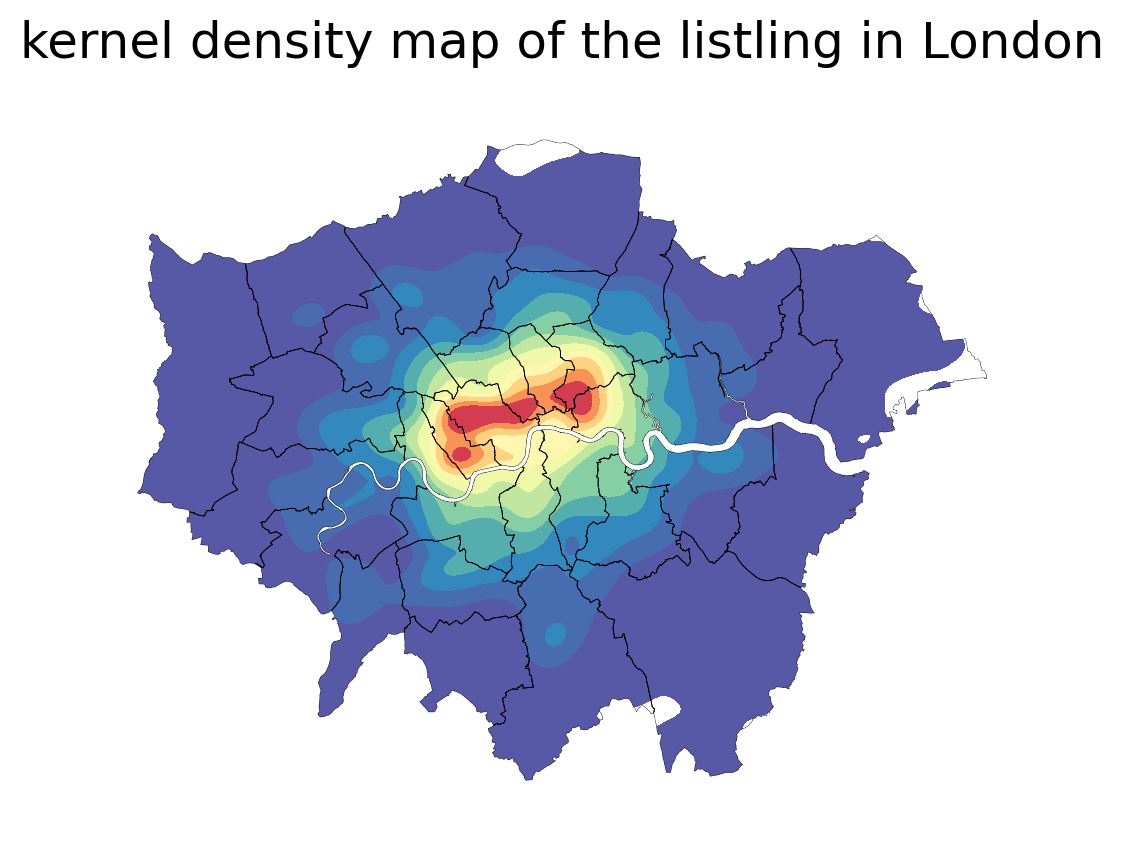

In [5]:
regions = gpd.read_file('london_boroughs.json')
points = gpd.read_file('point.geojson')

fig,ax = plt.subplots(figsize=(8,5),dpi=200)
proj = projection=gcrs.AlbersEqualArea()
ax = plt.subplot(projection=proj)
gplt.kdeplot(
    points,
    cmap = "Spectral_r",
    clip = regions.geometry,
    projection=proj,
    levels=12,
    thresh=.0005,
    shade=True,
    ax=ax,
)
gplt.polyplot(regions, zorder=1,facecolor="none",linewidth=.3,ax=ax)
plt.title("kernel density map of the listling in London",fontsize = 18)
#plt.show()
plt.savefig("kernel density map of the listling in London", dpi=300)

### Processing data and fit it into the DBCAN algorithm to show where are the main boroughs for Airbnb activity in London.

In [ ]:
data = pd.read_csv('listings.csv', encoding='utf-8')
england = geo.GeoDataFrame.from_file('dissoved/dissoved/dissoved.shp', encodings='utf-8')
england = england.to_crs('EPSG:4326')

# using shapely package to reduce the run space and increase the run speed
shapely.speedups.enable()

# using within to delete the the points which are out the boundary. pip mask' dtpye is boolen. 
pip_mask = geo_points.within(england.loc[0, 'geometry'])
pip_data = geo_points.loc[pip_mask]

# create a longitude and latitude system for the next clustering.
coord_list = [[x, y] for x, y in zip(pip_data.x, pip_data.y)]
coord = pd.DataFrame(coord_list)
coord.columns = ['longitude', 'latitude']
coord.to_csv("superhost_point.csv")

In [22]:
regions = geo.GeoDataFrame.from_file('ESRI/London_Borough_Excluding_MHW.shp', encoding='utf-8')
regions = regions.to_crs('EPSG:4326')

# find the central points for each borough, which is used for plot the text for borough
regions['central'] = regions.centroid

# transform the dataframe to the numpy array which is fit the clustering algorithm
data = pd.read_csv("superhost_point.csv")
data = data[['longitude', 'latitude']]
coordinate = data.to_numpy()
x = coordinate

# because it is the spatial data, choosing DBSCAN to clustering and after many attemptes, set the parameters eps to 0.006 and 
# the min_points to 30 
db = clu.DBSCAN(eps=0.006, min_samples=30).fit(x)
labels = db.labels_

C:\Users\LYC\AppData\Local\Temp\ipykernel_23760\1179648605.py:3: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  regions['central'] = regions.centroid


### Making visualization for the result of the clustering. 

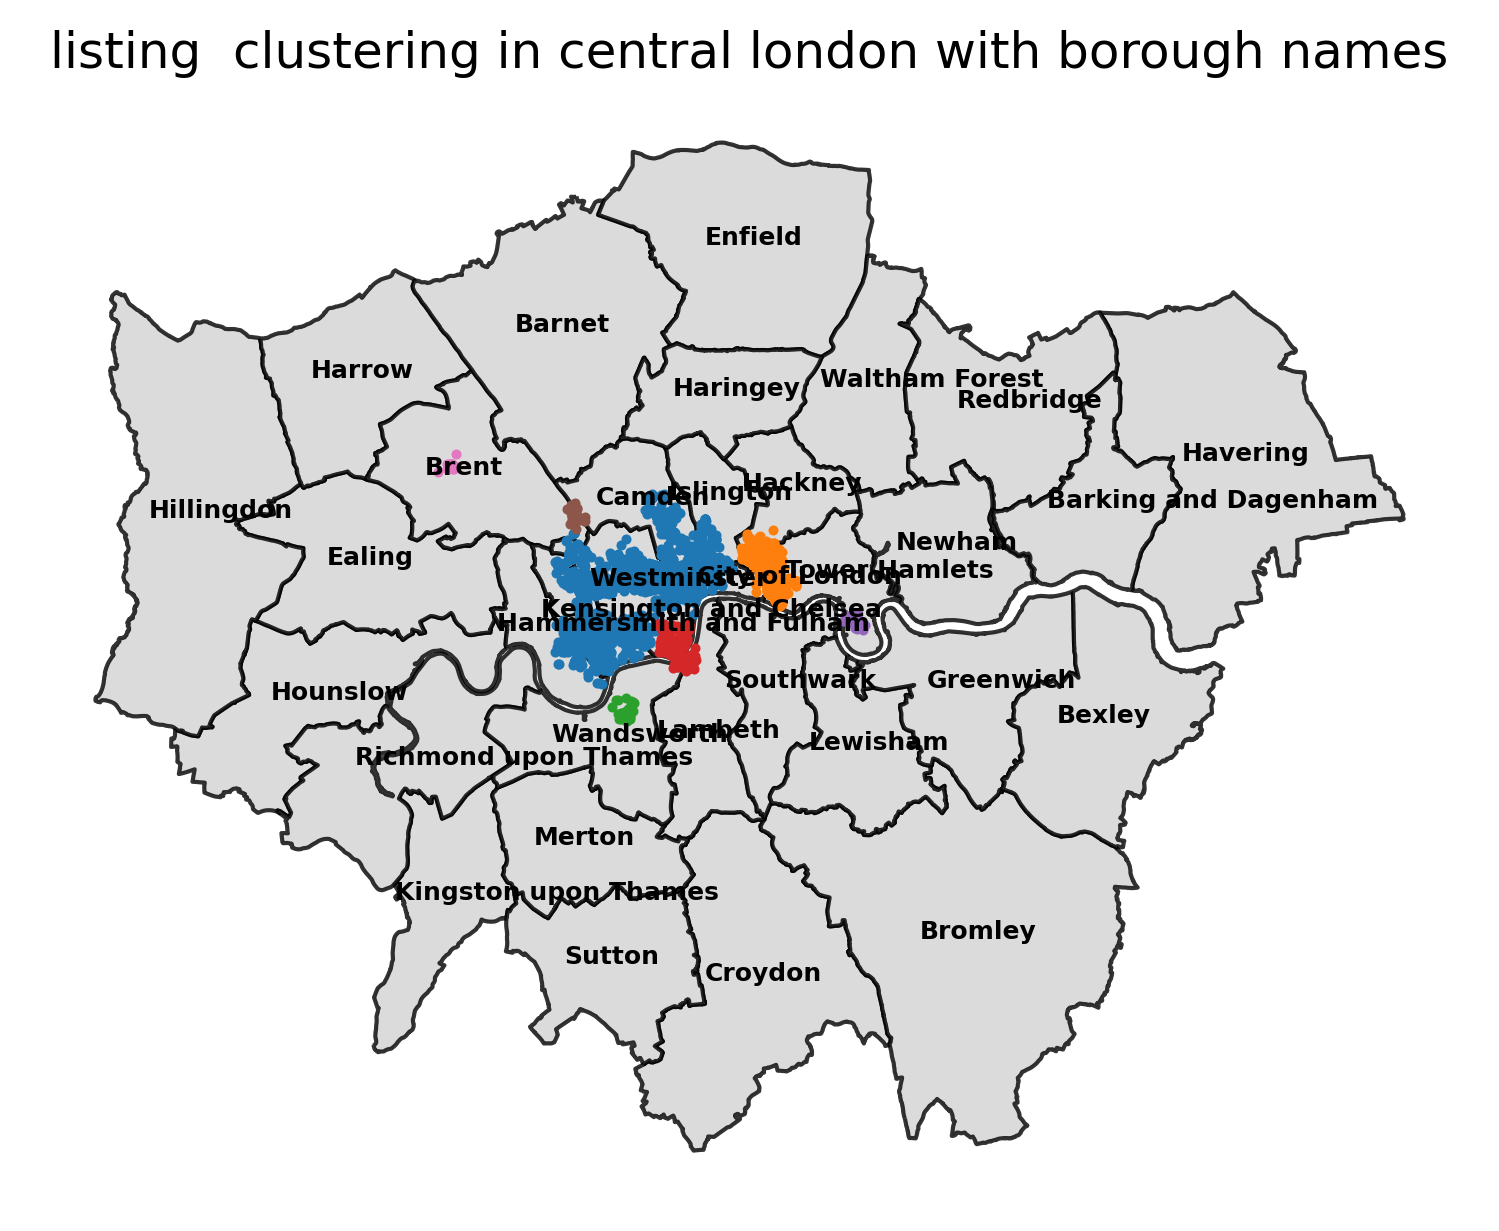

In [23]:
# create clustering result list
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
fig, ax = plt.subplots(dpi=300)
ax.set_aspect('equal')
ax.axis('off')
plt.title("listing  clustering in central london with borough names")
regions.plot(ax=ax, color='lightgrey', edgecolor='k', alpha=0.8)
for i in range(len(regions)):
    plt.text(regions['central'].loc[i].x - 0.03, regions['central'].loc[i].y, regions['NAME'].loc[i], fontsize=6, weight='heavy')
for i in range(n_clusters_):
    one_cluster = x[labels == i]
    plt.scatter(one_cluster[:, 0], one_cluster[:, 1], s=2)
#plt.show()
plt.savefig("clustering_result.png", dpi=300)

### In the end, we create a hotmap to show and analyse the income inequality of Airbnb hosts.

In [30]:
regions_complete = geo.GeoDataFrame.from_file('ESRI/London_Borough_Excluding_MHW.shp', encoding='utf-8')
regions_complete = regions_complete.to_crs('EPSG:4326')
regions = geo.GeoDataFrame.from_file('ESRI/London_Borough_Excluding_MHW.shp', encoding='utf-8')
regions = regions.to_crs('EPSG:4326')
namelist = ['Brent', 'Camden', 'Hammersmith and Fulham', 'Kensington and Chelsea', 'Westminster', 'Wandsworth', 'Lambeth',
            'Islington', 'Tower Hamlets', 'Hackney']

C:\Users\LYC\AppData\Local\Temp\ipykernel_23760\3686966174.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_price['NAME'] = new_price['neighbourhood_cleansed']
C:\Users\LYC\AppData\Local\Temp\ipykernel_23760\3686966174.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_price_final['Average '].loc[i] = strings


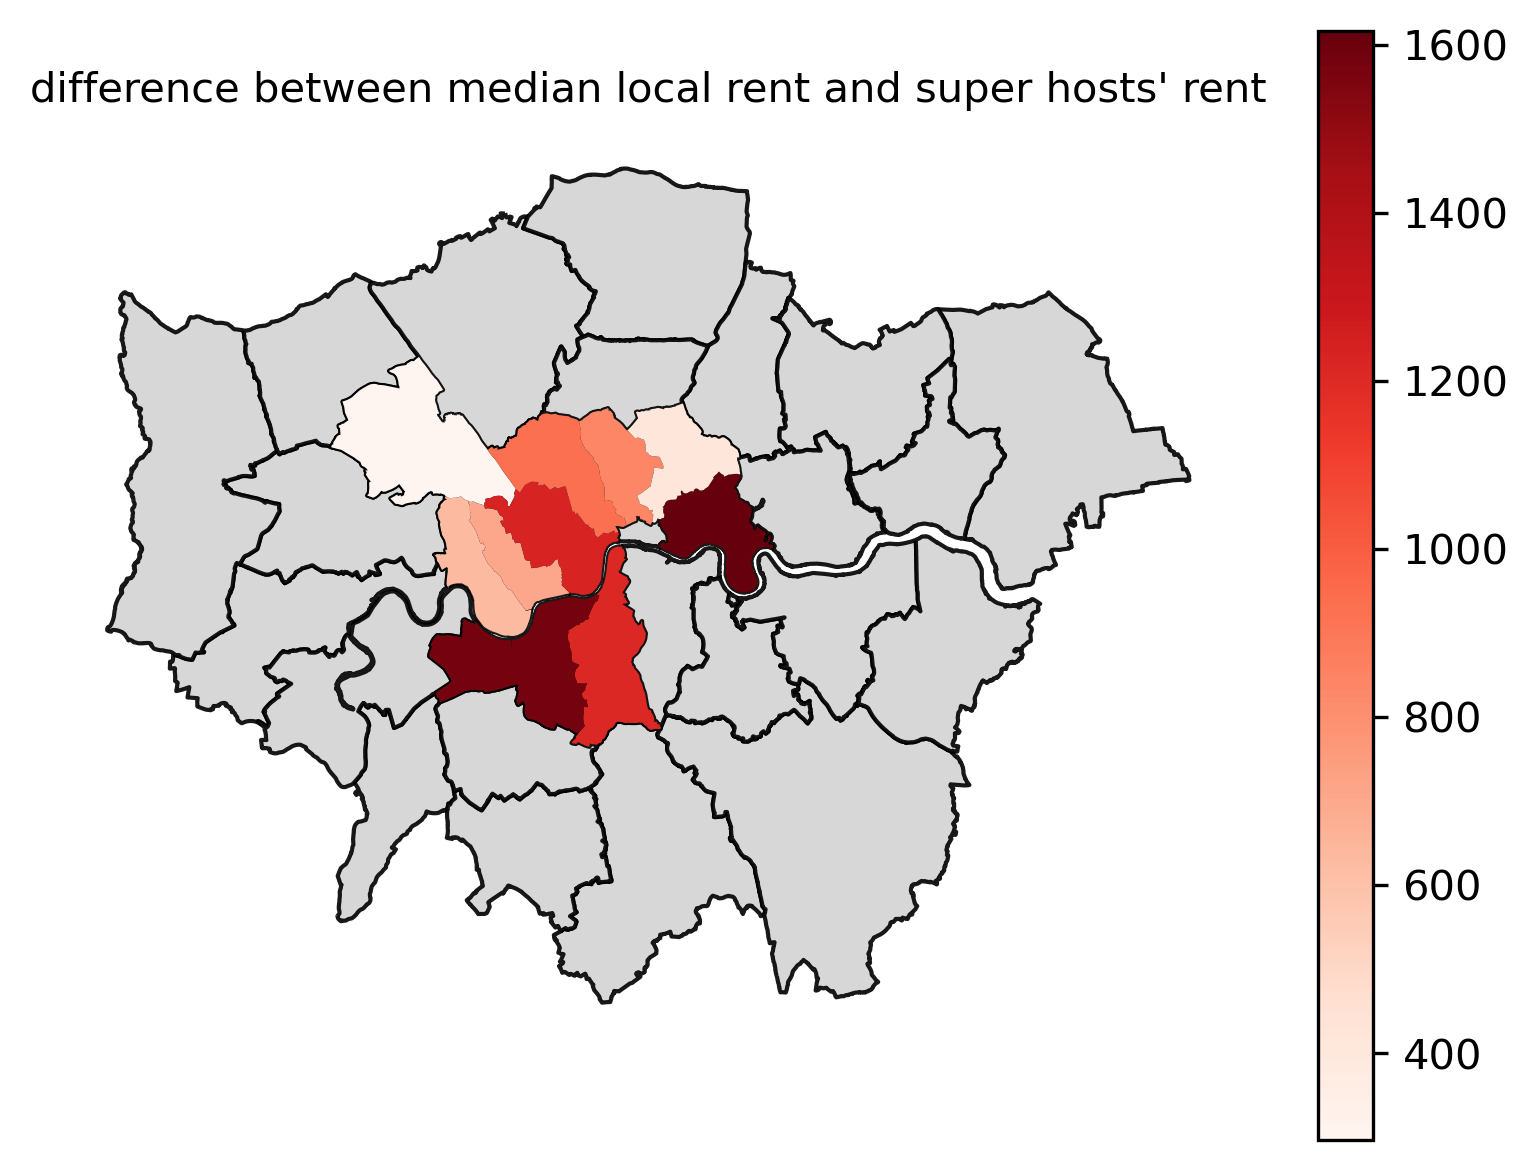

In [31]:
regions = regions.iloc[[8, 10, 21, 22, 23, 24, 25, 26, 27, 28], :]
data = pd.read_csv("dissoved/dissoved/rents per month.csv")
data['NAME'] = data['Area']
new_df = pd.merge(regions, data, how='left')

new = pd.read_csv('new.csv')
new_price = new[['price', 'neighbourhood_cleansed']]
new_price['NAME'] = new_price['neighbourhood_cleansed']
new_price_final = pd.merge(new_df, new_price, how='left')
#print(new_price_final)

# calculate the average and the dif for the borough after clustering
for i in range(len(new_price_final)):
    strings = new_price_final['Average '].loc[i]
    strings = strings.replace(',', '')
    new_price_final['Average '].loc[i] = strings
#print(new_price_final['Average '])
new_price_final['Average '] = new_price_final['Average '].apply(pd.to_numeric)
new_price_final['dif'] = new_price_final['price'] - new_price_final['Average ']

# plot
fig, ax = plt.subplots(dpi=300)
plt.title("difference between median local rent and super hosts' rent", fontsize=10)
regions_complete.plot(ax=ax, color='lightgrey', edgecolor='k', alpha=0.9)
new_price_final.plot(ax=ax, column='dif', cmap='Reds', legend=True)
plt.axis('off')
#plt.show
plt.savefig("hotmap.png", dpi=300)